## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Data Processing

In [ ]:
data = np.genfromtxt('heartdata.csv', delimiter=',')
X_data = data[:, [0, 3]]
Y_data = data[:, 13]
for i in range(len(Y_data)):
  if Y_data[i] == 0:
    Y_data[i] = -1
print(X_data.shape)
print(Y_data.shape)

(303, 2)
(303,)


## Feature Rescaling 

In [ ]:
col1 = 2.*(X_data[:,0] - np.min(X_data[:,0]))/np.ptp(X_data[:,0])-1
col2 = 2.*(X_data[:,1] - np.min(X_data[:,1]))/np.ptp(X_data[:,1])-1
col1 = col1.reshape(-1,1)
col2 = col2.reshape(-1,1)
X_data_scaled = np.concatenate((col1, col2), axis=1)
print(X_data_scaled)

[[ 0.41666667 -0.03773585]
 [ 0.58333333  0.24528302]
 [ 0.58333333 -0.50943396]
 [-0.66666667 -0.32075472]
 [-0.5        -0.32075472]
 [ 0.125      -0.50943396]
 [ 0.375      -0.13207547]
 [ 0.16666667 -0.50943396]
 [ 0.41666667 -0.32075472]
 [ 0.         -0.13207547]
 [ 0.16666667 -0.13207547]
 [ 0.125      -0.13207547]
 [ 0.125      -0.32075472]
 [-0.375      -0.50943396]
 [-0.04166667  0.47169811]
 [ 0.16666667  0.05660377]
 [-0.20833333 -0.69811321]
 [ 0.04166667 -0.13207547]
 [-0.20833333 -0.32075472]
 [-0.16666667 -0.32075472]
 [ 0.45833333 -0.69811321]
 [ 0.20833333  0.05660377]
 [ 0.20833333 -0.50943396]
 [ 0.20833333 -0.28301887]
 [ 0.29166667 -0.32075472]
 [-0.125      -0.50943396]
 [ 0.20833333 -0.50943396]
 [ 0.54166667  0.05660377]
 [-0.41666667  0.05660377]
 [-0.54166667 -0.69811321]
 [ 0.66666667 -0.13207547]
 [ 0.29166667 -0.56603774]
 [ 0.45833333 -0.13207547]
 [ 0.25       -0.22641509]
 [-0.375      -0.32075472]
 [-0.45833333 -0.13207547]
 [-0.41666667 -0.50943396]
 

In [ ]:
Y_data_scaled = Y_data
print(Y_data_scaled.shape)
print(Y_data_scaled)

(303,)
[-1.  1.  1. -1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1.
  1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1.
  1.  1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.
  1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1.
  1.  1.  1.  1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1.
 -1.  1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1.
  1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1. -1.
 -1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1.

## Train-Test Split

In [ ]:
train_ratio = 0.7
train_len = int(train_ratio * len(X_data_scaled))
X_train, Y_train = X_data_scaled[:train_len,:], Y_data_scaled[:train_len]
X_test, Y_test = X_data_scaled[train_len:,:], Y_data_scaled[train_len:]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(212, 2) (212,)
(91, 2) (91,)


## Helper Methods for SVM with SMO implementation

In [ ]:
# Helper Methods

def rbf_kernel(x1, x2, sigma = 1):
  return np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * (sigma ** 2)))

def GetTprAndFpr(predicted, actual):
    cm = np.zeros((2,2))
    for i in range(len(predicted)):
        if(actual[i] == -1):
            if predicted[i] == -1:
                cm[0][0] += 1
            else:
                cm[0][1] += 1
        else:
            if predicted[i] == -1:
                cm[1][0] += 1
            else:
                cm[1][1] += 1
    tpr = cm[1][1] / (cm[1][1] + cm[1][0])
    fpr = cm[0][1] / (cm[0][1] + cm[0][0])
    return tpr, fpr


## SVM with SMO implementation

In [19]:
class SvmSmo(object):
  
  def __init__(self, X_train, Y_train, C = 1, epsilon = 0.001, n_passes = 4):
    self.X_train = X_train
    self.Y_train = Y_train
    self.C = C
    self.epsilon = epsilon
    self.n_passes = n_passes

    self.diff = np.inf
    n_samples, n_features = self.X_train.shape
    self.n_samples = n_samples
    self.n_features = n_features
    
    self.alpha = np.zeros(self.n_samples)
    self.kernel = rbf_kernel
    self.W = 0
    self.B = 0
    
    self.fit()
  
  def fit(self):
    passes = 0
    samples, features = self.X_train.shape
    max_passes = 4
    tol = self.epsilon
    passes = 0
    while passes < self.n_passes:
        alpha_old = np.copy(self.alpha)
        changes = 0
        for i in range(samples):
            self.W = self.X_train.T@(alpha_old*self.Y_train)
            error_i = np.sign(self.W.T@self.X_train[i] + self.B) - self.Y_train[i]
            if not (((self.Y_train[i]*error_i < -tol) and (self.alpha[i] < self.C)) or ((self.Y_train[i]*error_i > tol))):
                continue
            j = i
            while j == i:
                j = random.randint(0, self.n_samples - 1)
            
            eta = 2 * self.kernel(self.X_train[i], self.X_train[j])
            eta -= self.kernel(self.X_train[i], self.X_train[i]) 
            eta -= self.kernel(self.X_train[j], self.X_train[j])
            if eta == 0:
                continue
            
            if self.Y_train[i] != self.Y_train[j] :
                l = max(0, self.alpha[j] - self.alpha[i])
                h = min(self.C, self.C - self.alpha[i] + self.alpha[j])
            else:
                l = max(0, self.alpha[i] + self.alpha[j] - self.C)
                h = min(self.C, self.alpha[i] + self.alpha[j])
            if l == h:
                continue
            error_j = np.sign(self.W.T@self.X_train[j] + self.B) - self.Y_train[j]
            self.alpha[j] = alpha_old[j] - self.Y_train[j] * (error_i - error_j)/ eta
            if self.alpha[j] > h:
                self.alpha[j] = h
            if self.alpha[j] < l:
                self.alpha[j] = l
            if abs(self.alpha[j] - alpha_old[j]) < 0.00001:
                self.alpha[j] = alpha_old[j]
                continue
            self.alpha[i] = alpha_old[i] + self.Y_train[i]*self.Y_train[j] * (alpha_old[j] - self.alpha[j]) 
            b1 = self.B - error_i - self.Y_train[i]*(self.alpha[i] - alpha_old[i]) * self.kernel(self.X_train[i], self.X_train[i])
            b1 -= self.Y_train[j]*(self.alpha[j] - alpha_old[j]) * self.kernel(self.X_train[i], self.X_train[j])
            
            b2 = self.B - error_j - self.Y_train[i]*(self.alpha[i] - alpha_old[i]) * self.kernel(self.X_train[i], self.X_train[j])
            b2 -= self.Y_train[j]*(self.alpha[j] - alpha_old[j]) * self.kernel(self.X_train[j], self.X_train[j])
            
            if self.alpha[i] > 0 and self.alpha[i] < self.C:
                self.B = b1
            elif self.alpha[j] > 0 and self.alpha[j] < self.C:
                self.B = b2
            else:
                self.B = (b1 + b2) / 2
            
            changes += 1
        if changes == 0:
          passes += 1
        else:
          passes = 0
 
        diff = np.linalg.norm(self.alpha - alpha_old)

    self.W = self.X_train.T@(self.alpha * self.Y_train)
    self.B = np.mean(self.Y_train - self.W.T@self.X_train.T)
    return self.W, self.B

  def predict(self, X_test, threshold = 0):
    if threshold == 0:
      return np.sign(self.W.T@X_test.T + self.B)
    result = self.W.T@X_test.T + self.B
    Y_predicted = []
    for val in result:
        if val >= threshold:
            Y_predicted.append(1)
        else:
            Y_predicted.append(-1)
    return np.array(Y_predicted)

  def getAccuracy(self, X_test, Y_test):
    predict = self.predict(X_test)
    actual = Y_test
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predict[i]:
            correct += 1
    return correct / len(actual) * 100
  
  def displayRocCurve(self):
    threshold_list = np.arange(-500, 500, 2)
    X_plot = []
    Y_plot = []
    for threshold in threshold_list:
        tpr, fpr = GetTprAndFpr(self.predict(X_test, threshold),Y_test)
        X_plot.append(fpr)
        Y_plot.append(tpr)

    plt.figure(figsize=(8,8))
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(X_plot,Y_plot)

In [34]:
svm_with_smo_model = SvmSmo(X_train, Y_train, 100, 0.1)
accuracy = svm_with_smo_model.getAccuracy(X_train, Y_train)
print( f' Accuracy : { round(accuracy, 2)}%')

 Accuracy : 65.57%


In [33]:
svm_with_smo_model = SvmSmo(X_train, Y_train, 100, 0.1)
accuracy = svm_with_smo_model.getAccuracy(X_test, Y_test)
print( f' Accuracy : { round(accuracy, 2)}%')

 Accuracy : 58.24%


## Analysis

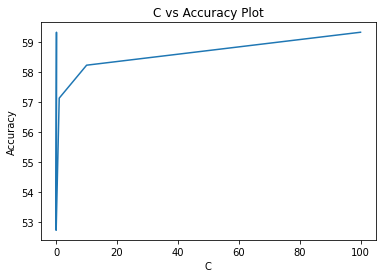

In [35]:
C_list = [1e-4, 1e-3, 1e-2, 1e-1, 0, 1,10,100]
acc_list = []
for C in C_list:
  svm_with_smo_model = SvmSmo(X_train, Y_train, C, 0.001)
  accuracy = svm_with_smo_model.getAccuracy(X_test, Y_test)
  acc_list.append(accuracy)

plt.plot(C_list, acc_list)
plt.title('C vs Accuracy Plot')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

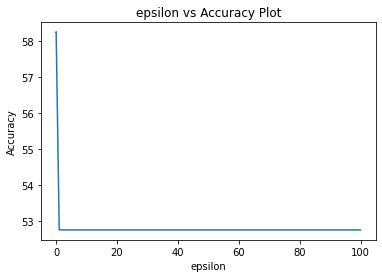

In [36]:
epsilon_list = [1e-2, 1e-1, 0, 1, 10, 100]
acc_list = []
for epsilon in epsilon_list:
  svm_with_smo_model = SvmSmo(X_train, Y_train, 1, epsilon)
  accuracy = svm_with_smo_model.getAccuracy(X_test, Y_test)
  acc_list.append(accuracy)

plt.plot(epsilon_list, acc_list)
plt.title('epsilon vs Accuracy Plot')
plt.xlabel('epsilon')
plt.ylabel('Accuracy')
plt.show()

In [31]:
epsilon_list = [1e-2, 1e-1, 0, 1, 10, 100]
C_list = [1e-4, 1e-3, 1e-2, 1e-1, 0, 1,10,100]
best_result = [0, None, None]
for epsilon in epsilon_list:
  for C in C_list:
    svm_with_smo_model = SvmSmo(X_train, Y_train, 1, epsilon)
    accuracy = svm_with_smo_model.getAccuracy(X_test, Y_test)
    print(f'For C = {C} and epsilon = {epsilon} : Accuracy = {round(accuracy,2)}% ')
    if best_result < [accuracy, C, epsilon]:
      best_result = [accuracy, C, epsilon]

print('Best Result:')
print(best_result)

For C = 0.0001 and epsilon = 0.01 : Accuracy = 58.24% 
For C = 0.001 and epsilon = 0.01 : Accuracy = 58.24% 
For C = 0.01 and epsilon = 0.01 : Accuracy = 60.44% 
For C = 0.1 and epsilon = 0.01 : Accuracy = 59.34% 
For C = 0 and epsilon = 0.01 : Accuracy = 57.14% 
For C = 1 and epsilon = 0.01 : Accuracy = 59.34% 
For C = 10 and epsilon = 0.01 : Accuracy = 58.24% 
For C = 100 and epsilon = 0.01 : Accuracy = 60.44% 
For C = 0.0001 and epsilon = 0.1 : Accuracy = 58.24% 
For C = 0.001 and epsilon = 0.1 : Accuracy = 59.34% 
For C = 0.01 and epsilon = 0.1 : Accuracy = 59.34% 
For C = 0.1 and epsilon = 0.1 : Accuracy = 59.34% 
For C = 0 and epsilon = 0.1 : Accuracy = 59.34% 
For C = 1 and epsilon = 0.1 : Accuracy = 57.14% 
For C = 10 and epsilon = 0.1 : Accuracy = 59.34% 
For C = 100 and epsilon = 0.1 : Accuracy = 59.34% 
For C = 0.0001 and epsilon = 0 : Accuracy = 58.24% 
For C = 0.001 and epsilon = 0 : Accuracy = 60.44% 
For C = 0.01 and epsilon = 0 : Accuracy = 60.44% 
For C = 0.1 and epsil

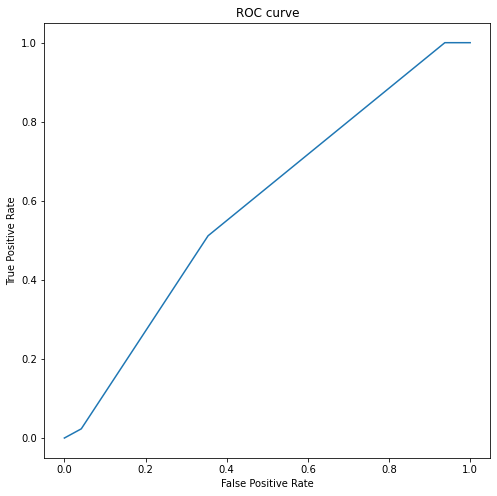

In [ ]:
svm_with_smo_model.displayRocCurve()